<div style="text-align:center; color: blue"><h1>Sprint 5: SkLearn</h1></div>

In [1]:
#importamos las librearias necesarias
import pandas as pd

#Importamos el dataset
dataset = pd.read_csv('housing_data.csv', header=None)

In [2]:
#De acuerdo con la descripción del dataset, sabemos que corresponden al valor de la vivienda en los suburbios de Boston
#vamos visualizar los valores, las columnas, y los tipos de datos
dataset 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Observamos que el dataset no tiene nombres de las columnas por lo tanto vamos a añadirlos en base a la información que tenemos en el archivo "housing_data_description.txt"

In [3]:
import re
with open('housing_data_description.txt', 'r') as f:
    content = f.read()


pattern = re.compile(r'\d+\.\s+([A-Z]+)')
column_names = pattern.findall(content)

relevant_column_names = column_names[column_names.index('CRIM'):column_names.index('MEDV')+1]

print(relevant_column_names)


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [4]:
#asignamos los nombres de las columnas al dataset
dataset.columns = relevant_column_names
#ahora vamos a visualizar los datos
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Una simple visualización de los datos nos permite saber que trbajamos con columnas numericas (enteros y flotantes)

**EJERCICIO 1**: Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.

También adjunto encontrarás una descripción de las diferentes variables del dataset.

In [6]:
from sklearn.model_selection import train_test_split

#separamos los datos en train y test, asignamos el 20% de los datos para test y el 80% para train
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

In [7]:
#mostremos los datos de train
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28,18.2


In [8]:
#mostremos los datos de test
test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27,16.1


In [9]:
#Estudiamos descriptrivamente los datos de train
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
#Estudiamos descriptrivamente los datos de test
test_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.630947,10.549020,11.737745,0.058824,0.547609,6.160833,68.648039,3.742949,10.313725,424.892157,18.999020,358.241275,13.428235,21.488235
std,7.459607,24.083242,6.722576,0.236456,0.108602,0.663825,28.890866,2.010749,9.161889,177.462472,1.800577,90.641872,7.244601,8.605804
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.561000,6.200000,1.169100,1.000000,188.000000,13.000000,6.680000,2.880000,5.000000
25%,0.087368,0.000000,6.102500,0.000000,0.448250,5.870250,43.800000,2.263950,4.000000,281.750000,18.400000,375.020000,7.687500,17.125000
50%,0.209885,0.000000,10.590000,0.000000,0.532000,6.170500,74.700000,3.353400,5.000000,345.000000,19.200000,392.205000,12.335000,20.150000
75%,4.522472,0.000000,18.100000,0.000000,0.621500,6.479250,95.225000,4.764825,24.000000,666.000000,20.200000,396.900000,18.017500,24.075000
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.034000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


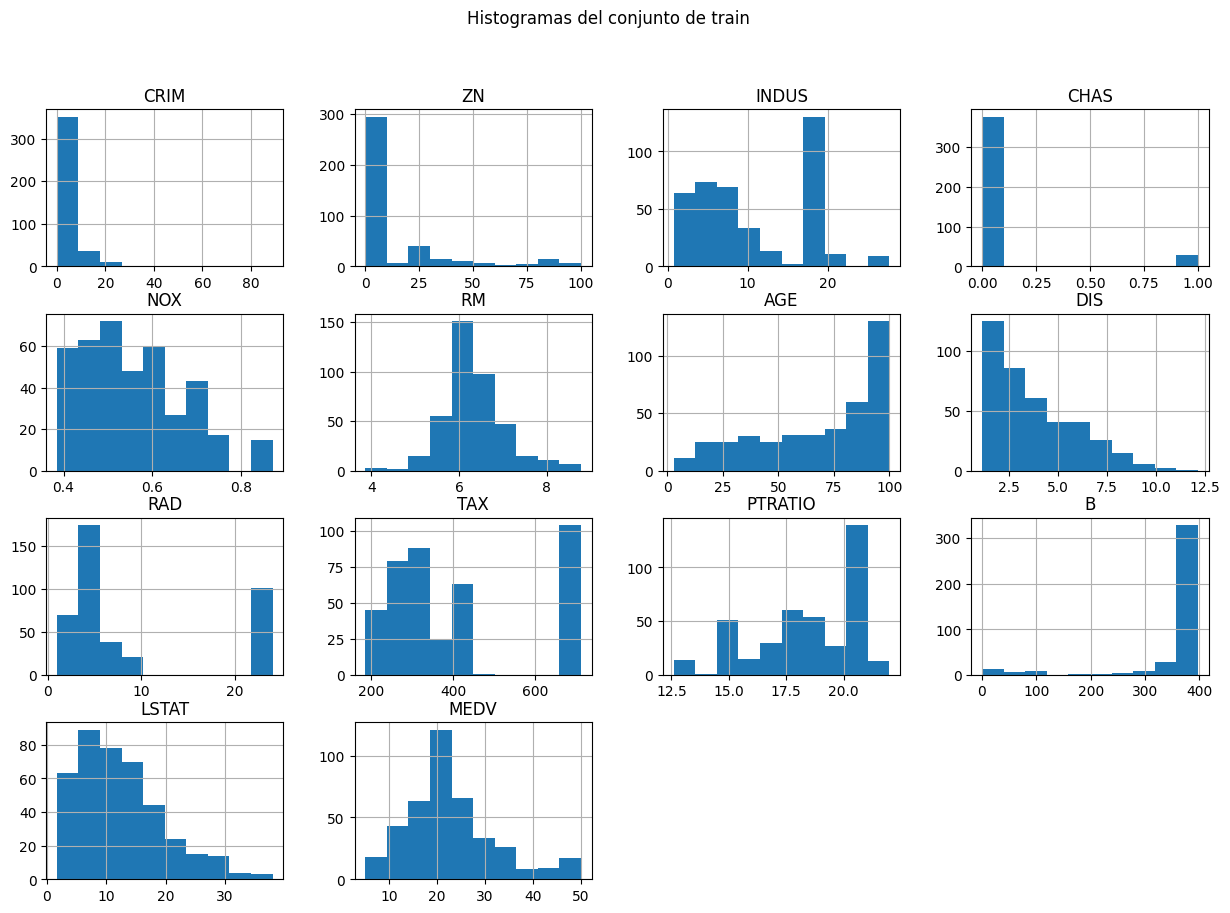

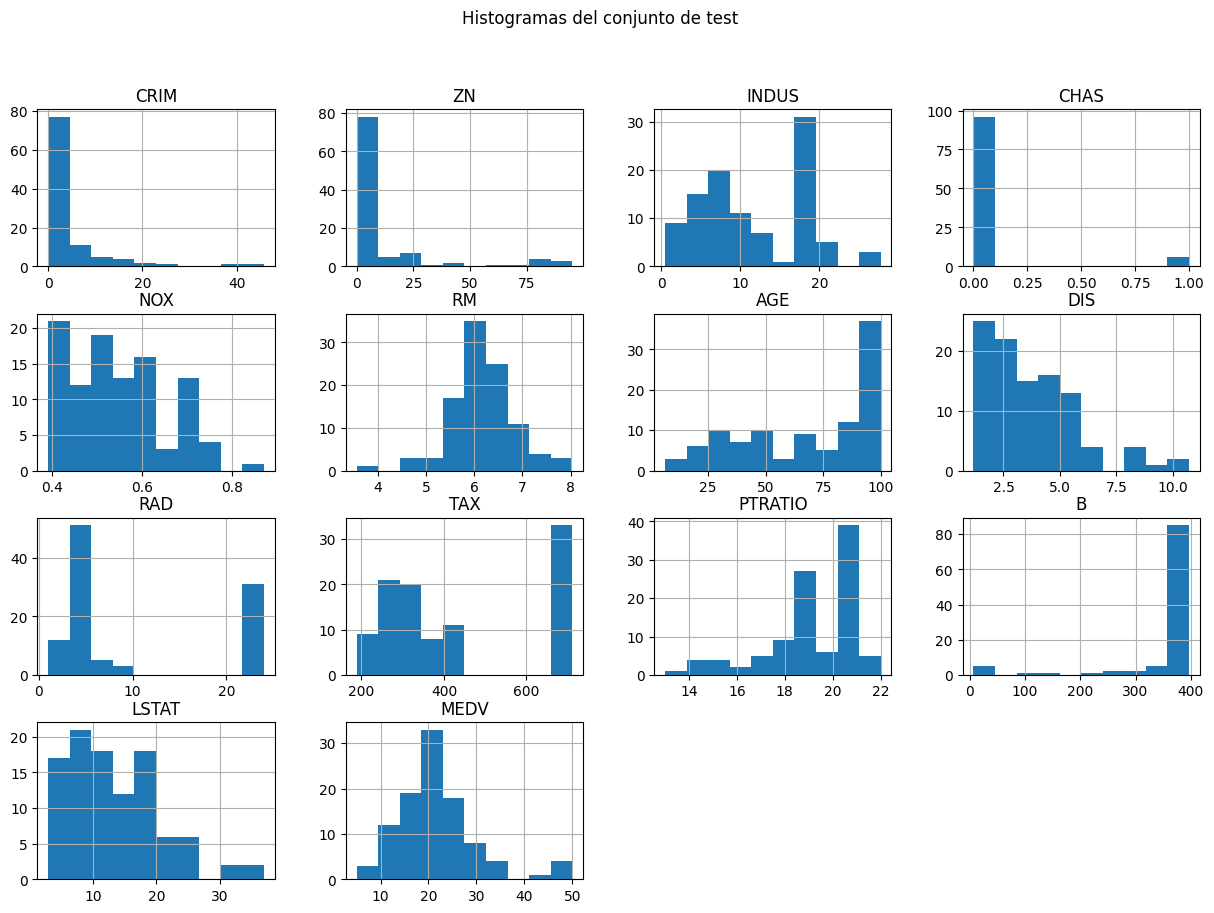

In [27]:
import matplotlib.pyplot as plt

train_df.hist(figsize=(15,10))
plt.suptitle("Histogramas del conjunto de train")
plt.show()

test_df.hist(figsize=(15,10))
plt.suptitle("Histogramas del conjunto de test")
plt.show()

**EJERCICIO 2**: Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).

In [11]:
#Procedemos a estandarizar los datos
from sklearn.preprocessing import StandardScaler

#instanciamos el objeto
scaler = StandardScaler()

boston_standardized = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

In [12]:
boston_standardized 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


* La estandarización es un procedimiento que consiste en restar la media y dividir por la desviación típica. Esto hace que la media sea 0 y la desviación típica 1. Lo que se consigue con esto es que todas las variables tengan la misma escala y que los algoritmos de aprendizaje no se vean afectados por aquellas variables que tengan una escala mayor.

* No crearé columnas dummies porque no hay variables categóricas. Normalmente se crean columnas dummies para las variables categóricas porque los algoritmos de aprendizaje no pueden trabajar con variables categóricas.

In [14]:
#crearemos polinomios debido a que a veces las relaciones entre las variables no son lineales. Una forma de capturar estas relaciones no lineales es mediante polinomios.
#crearemos polinomios,  de grado 2 y los añadiremos al dataset original
from sklearn.preprocessing import PolynomialFeatures

#instanciamos el objeto
poly = PolynomialFeatures(degree=2, interaction_only=True)

boston_poly = pd.DataFrame(poly.fit_transform(boston_standardized), columns=poly.get_feature_names_out(boston_standardized.columns))
boston_poly.head()

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,TAX PTRATIO,TAX B,TAX LSTAT,TAX MEDV,PTRATIO B,PTRATIO LSTAT,PTRATIO MEDV,B LSTAT,B MEDV,LSTAT MEDV
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,...,0.972582,-0.294009,0.716979,-0.106448,-0.643495,1.569246,-0.232981,-0.474379,0.070430,-0.171752
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,...,0.299254,-0.435464,0.486200,0.100238,-0.133680,0.149255,0.030771,-0.217191,-0.044777,0.049995
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,...,0.299254,-0.391404,1.193412,-1.307468,-0.120155,0.366358,-0.401371,-0.479172,0.524967,-1.600653
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,...,-0.125027,-0.460324,1.505994,-1.308266,0.047040,-0.153895,0.133690,-0.566613,0.492220,-1.610345
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,...,-0.125027,-0.487854,1.135429,-1.645349,0.049853,-0.116028,0.168136,-0.452740,0.656066,-1.526924


### Se observa ahora que se han creado polinomios de grado 2 para las variables numéricas. Esto se hace para que los algoritmos de aprendizaje puedan capturar relaciones no lineales entre las variables.

In [15]:
# Estadísticas descriptivas de las nuevas características
print(boston_poly.describe())

           1          CRIM            ZN         INDUS          CHAS   
count  506.0  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  \
mean     1.0 -1.123388e-16  7.898820e-17  2.106352e-16 -3.510587e-17   
std      0.0  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min      1.0 -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01   
25%      1.0 -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01   
50%      1.0 -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01   
75%      1.0  7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01   
max      1.0  9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00   

                NOX            RM           AGE           DIS           RAD   
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  \
mean  -1.965929e-16 -1.088282e-16 -1.474446e-16 -8.425408e-17 -1.123388e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -1.465882e+00 -3.880249e+00 -

**EJERCICIO 3**: Resume las nuevas columnas generadas de forma estadística y gráfica.

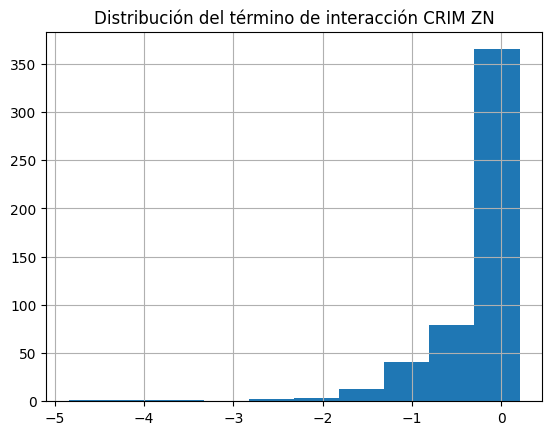

In [18]:
# Histograma para la característica de interacción CRIM ZN
import matplotlib.pyplot as plt

boston_poly['CRIM ZN'].hist()
plt.title('Distribución del término de interacción CRIM ZN')
plt.show()

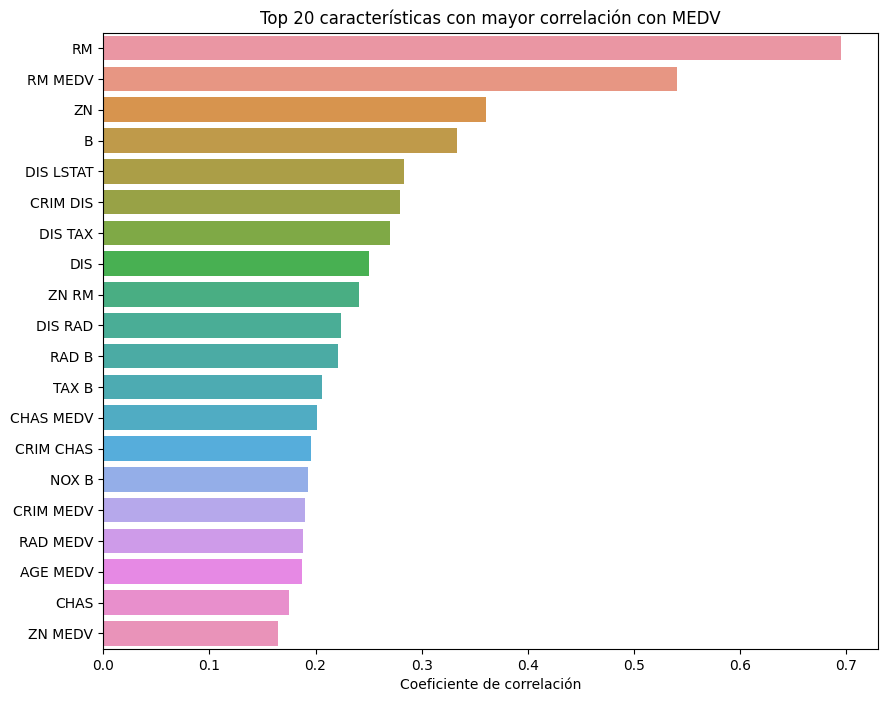

In [22]:
import seaborn as sns

# Correlación de las nuevas características con MEDV (precio de la vivienda)
correlations = boston_poly.corr()['MEDV'].sort_values(ascending=False)
top_features = correlations.iloc[1:21]  # Excluimos la primera porque es la correlación de MEDV consigo misma

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 20 características con mayor correlación con MEDV')
plt.xlabel('Coeficiente de correlación')
plt.show()

**Análisis de los resultados**: Aunque el coeficiente correlacion no es un determinante de la importancia de una variable, si que nos puede dar una idea de que variables son más importantes que otras. En este caso, las variables que más correlación tienen con el precio son: 
* RM: que es logico ya que representa el numero promedio de habitaciones por vivienda.
* RM MEDV: es un término de interacción entre RM y MEDV. Es interesante observar que una característica de interacción entre el número promedio de habitaciones y el valor mediano de la vivienda tenga una alta correlación. Esto podría indicar que la relación entre RM y MEDV no es simplemente lineal, sino que hay una interacción más compleja entre estas dos características.
* ZN: Representa la proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados. Una mayor proporción podría indicar áreas más suburbanas o rurales donde las parcelas son más grandes y, potencialmente, las viviendas son más caras.

* B: Representa la proporción de residentes de raza negra por ciudad. La correlación entre B y MEDV podría reflejar factores socioeconómicos y demográficos que afectan el valor de las viviendas. Sin embargo, es fundamental tener cuidado al interpretar o actuar en base a esta correlación para evitar sesgos y decisiones no éticas.
* DIS LSTAT: Es un término de interacción entre DIS (distancias ponderadas a cinco centros de empleo de Boston) y LSTAT (porcentaje de la población de menor estatus). Una correlación alta podría indicar que en áreas donde la distancia a los centros de empleo es mayor y hay un mayor porcentaje de población de menor estatus, hay un efecto combinado en el valor mediano de las viviendas.